# Pan Card using Computer vision. So checking if ID is genuine or not

skimage.metrics.structural_similarity: Computes the Structural Similarity Index (SSIM) to compare image similarities.
imutils: Simplifies image processing tasks like resizing, rotating, and translating images.
cv2 (OpenCV): A powerful library for computer vision tasks like image processing, feature detection, and video analysis.
PIL (Pillow): Handles image loading, manipulation, and saving across various formats.
requests: Fetches data (like images or APIs) from the web using HTTP requests.

In [2]:
!pip install scikit-image


   ---------------------------------------- 0.0/12.9 MB ? eta -:--:--
   ----------- ---------------------------- 3.7/12.9 MB 19.8 MB/s eta 0:00:01
   -------------------------- ------------- 8.4/12.9 MB 20.8 MB/s eta 0:00:01
   ---------------------------------------  12.8/12.9 MB 21.8 MB/s eta 0:00:01
   ---------------------------------------- 12.9/12.9 MB 20.2 MB/s eta 0:00:00
   ---------------------------------------- 0.0/1.6 MB ? eta -:--:--
   ---------------------------------------- 1.6/1.6 MB 14.7 MB/s eta 0:00:00


In [4]:
!pip install opencv-python imutils Pillow requests


  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
  Created wheel for imutils: filename=imutils-0.5.4-py3-none-any.whl size=25857 sha256=521b856baf4441845262d4898f690924a3d57657bc35d92746ff0860fca9b88b
  Stored in directory: c:\users\owner\appdata\local\pip\cache\wheels\4b\a5\2d\4a070a801d3a3d93f033d3ee9728f470f514826e89952df3ea
Successfully built imutils


In [5]:
# import lbraries
from skimage.metrics import structural_similarity
import imutils
import cv2
from PIL import Image
import requests

In [7]:
!mkdir pan_card_tampering
!mkdir pan_card_tampering_image

A subdirectory or file pan_card_tampering already exists.


In [8]:
# Open image and display
original = Image.open(requests.get('https://www.thestatesman.com/wp-content/uploads/2019/07/pan-card.jpg', stream=True).raw)
tampered = Image.open(requests.get('https://assets1.cleartax-cdn.com/s/img/20170526124335/Pan4.png', stream=True).raw) 

In [9]:
# The file format of the source file.
print("Original image format : ",original.format) 
print("Tampered image format : ",tampered.format)

# Image size, in pixels. The size is given as a 2-tuple (width, height).
print("Original image size : ",original.size) 
print("Tampered image size : ",tampered.size) 

Original image format :  JPEG
Tampered image format :  PNG
Original image size :  (1200, 800)
Tampered image size :  (282, 179)


In [11]:
# Resize Image
original = original.resize((250, 160))
print(original.size)
original.save('pan_card_tampering_image/original.png')#Save image
tampered = tampered.resize((250,160))
print(tampered.size)
tampered.save('pan_card_tampering_image/tampered.png')#Saves image

(250, 160)
(250, 160)


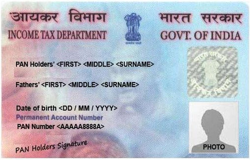

In [12]:
# Display original image
original

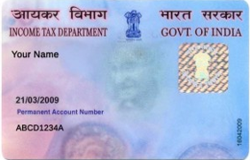

In [13]:
# Display user given image
tampered

In [14]:
# load the two input images
original = cv2.imread('pan_card_tampering_image/original.png')
tampered = cv2.imread('pan_card_tampering_image/tampered.png')

In [15]:
# Convert the images to grayscale
original_gray = cv2.cvtColor(original, cv2.COLOR_BGR2GRAY)
tampered_gray = cv2.cvtColor(tampered, cv2.COLOR_BGR2GRAY)

#### Converting images into grayscale using opencv. Because in image processing many applications doesn't help us in identifying the important, edges of the coloured images also coloured images are bit complex to understand by machine beacuse they have 3 channel while grayscale has only 1 channel.  

In [16]:
# Compute the Structural Similarity Index (SSIM) between the two images, ensuring that the difference image is returned
(score, diff) = structural_similarity(original_gray, tampered_gray, full=True)
diff = (diff * 255).astype("uint8")
print("SSIM: {}".format(score))

SSIM: 0.31686135690489126


# similarity is 31%
#### Structural similarity index helps us to determine exactly where in terms of x,y coordinates location, the image differences are. Here, we are trying to find similarities between the original and tampered image. The lower the SSIM score lower is the similarity.

In [17]:
# Calculating threshold and contours 
thresh = cv2.threshold(diff, 0, 255, cv2.THRESH_BINARY_INV | cv2.THRESH_OTSU)[1]
cnts = cv2.findContours(thresh.copy(), cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
cnts = imutils.grab_contours(cnts)

#### Here we are using the threshold function of computer vision which applies an adaptive threshold to the image which is stored in the form array. This function transforms the grayscale image into a binary image using a mathematical formula.
#### Find contours works on binary image and retrive the contours. This contours are a useful tool for shape analysis and recoginition. Grab contours grabs the appropriate value of the contours.

In [18]:
# loop over the contours
for c in cnts:
    # applying contours on image
    (x, y, w, h) = cv2.boundingRect(c)
    cv2.rectangle(original, (x, y), (x + w, y + h), (0, 0, 255), 2)
    cv2.rectangle(tampered, (x, y), (x + w, y + h), (0, 0, 255), 2)

#### Bounding rectangle helps in finding the ratio of width to height of bounding rectangle of the object. We compute the bounding box of the contour and then draw the bounding box on both input images to represent where the two images are different or not.

Original Format Image


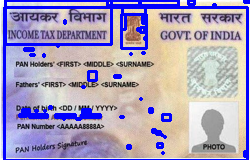

In [19]:
#Diplay original image with contour
print('Original Format Image')
Image.fromarray(original)

Tampered Image


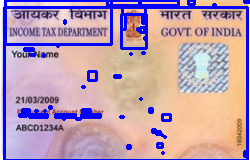

In [20]:
#Diplay tampered image with contour
print('Tampered Image')
Image.fromarray(tampered)

Different Image


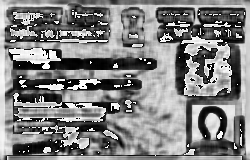

In [21]:
#Diplay difference image with black
print('Different Image')
Image.fromarray(diff)

Threshold Image


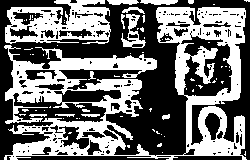

In [22]:
#Display threshold image with white
print('Threshold Image')
Image.fromarray(thresh)

#### Finding out structural similarity of the images helped us in finding the difference or similarity in the shape of the images. Similarly, finding out the threshold and contours based on those threshold for the images converted into grayscale binary also helped us in shape analysis and recognition. 
#### As, our SSIM is ~31.2% we can say that the image user provided is fake or tampered.
#### Finally we visualized the differences and similarities between the images using by displaying the images with contours, difference and threshold.  